In [1]:
#All library imports

import numpy as np

import sympy as sp

import warnings

import pandas as pd

import astropy as ast
from astropy.io import fits
from astropy.wcs import WCS
#pyfits manipulates FITS files

import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm #Colours bars etc.

#rc calls the objects you're going to be plotting
mp.rc('xtick', labelsize=20) #xtick is the size of the ticks on the x-axis     
mp.rc('ytick', labelsize=20)
TitleFont = 30 #Title font size
AxisFont = 25

In [2]:
from astropy.utils.data import download_file

In [113]:
dat_cu_file = "C:/Users/Rick/Desktop/Chapman_Stuff/spt2052/band7usb/spt2052_b7upper_spw2_dirty_contsub.fits"
dat_cu = fits.open(dat_cu_file) #Data cube


cl_im_file = "C:/Users/Rick/Desktop/Chapman_Stuff/spt2052/band7usb/spt2052_b7upper_spw2_dirty_contsub_mom1_north.fits"
cl_im = fits.open(cl_im_file) #Clean image "slice"

In [114]:
cl_im.info() #Prints out what the FITS file contains

img_dat = cl_im[0].data #Storing the data as a 2D numpy array
#Image info is generally stored in the 'PRIMARY' block

#What are the image dimensions? Look at the array shape
print(type(img_dat))
print(img_dat.shape)

Filename: C:/Users/Rick/Desktop/Chapman_Stuff/spt2052/band7usb/spt2052_b7upper_spw2_dirty_contsub_mom1_north.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     688   (35, 28, 1, 1)   float32   
<class 'numpy.ndarray'>
(1, 1, 28, 35)


In [115]:
#Closing the FITS file; everything we need is stored in img_dat
cl_im.close()

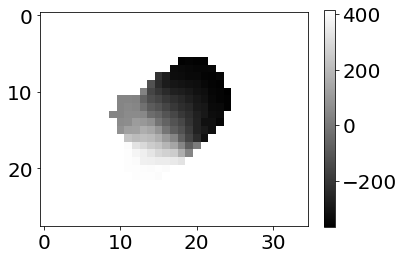

In [116]:
#Viewing the image data and getting basic stats

img_dat_crop = img_dat[:][:][0][0] #':' for calling everything in that part of the array, [0] for calling a 1D cell
plt.imshow(img_dat_crop, cmap='gray')
plt.colorbar()

In [84]:
len(img_dat_crop[:][:])

188

In [85]:
#Now, find the max intensity for this light source and the coordinates for it

maximum = np.nanmax(img_dat_crop)

print("Maximum intensity of the light source: " , maximum) #Maximum intensity of the light source

Maximum intensity of the light source:  5.204315


In [86]:
max_coord = np.where(img_dat_crop == np.nanmax(img_dat_crop))

print("Returned tuple of arrays: " , max_coord)
print("List of indices of maximum element: %i,%i"  %(max_coord[0],max_coord[1]))
xpt = int(max_coord[0])
ypt = int(max_coord[1])

Returned tuple of arrays:  (array([18], dtype=int64), array([30], dtype=int64))
List of indices of maximum element: 18,30


**Only use below cell if brightest spot in image yields poor spectra**

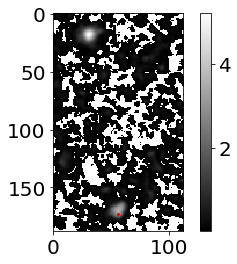

In [98]:
#Since we checked the max and it outputs a poor spectra, we're going to try the second-brightest source by estimating its brightest pixel coords

#Viewing the image data and getting basic stats

img_dat_crop = img_dat[:][:][0][0] #':' for calling everything in that part of the array, [0] for calling a 1D cell
plt.imshow(img_dat_crop, cmap='gray')
plt.colorbar()

xcheck = 56
ycheck = 173
plt.scatter(xcheck, ycheck, color='r', s=5)

In [100]:
print("Maximum intensity at (%i,%i) is: " %(ycheck,xcheck))
print(img_dat_crop[ycheck][xcheck])
Max_coord2 = img_dat_crop[ycheck][xcheck]

Maximum intensity at (173,56) is: 
3.321854


### Next steps

- Open the data cube and get the spectrum from that pixel.
- Extract the spectrum data as an array (or a Spectrum1D object) for later analysis.

In [101]:
#Info about the data cube

dat_cu.info()
print(type(dat_cu))

Filename: C:/Users/Rick/Desktop/Chapman_Stuff/spt2052/band7usb/spt2052_b7upper_spw2_dirty.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     619   (320, 320, 128, 1)   float32   
<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [102]:
def getFitsDat(filename):
    hdus = fits.open(filename) #Everything from dat_cu
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")        
        hdu = hdus[0] #The image
        header = hdu.header
        data = hdu.data #Data from the cube
        wcs = WCS(hdu.header) #Puts header in World Coordinates
    return (hdus, hdu, header, data, wcs)

In [111]:
dat_cu_all, img, header_data, cube_data, header_wcs = getFitsDat(dat_cu_file)

In [104]:
spec_data = np.zeros(128)
for i in range(128):
    spec_data[i] = cube_data[0][i][xcheck][ycheck]

In [105]:
Pandas_spec_data = pd.DataFrame({'Spec':spec_data}) #DataFrame = Pandas data frame

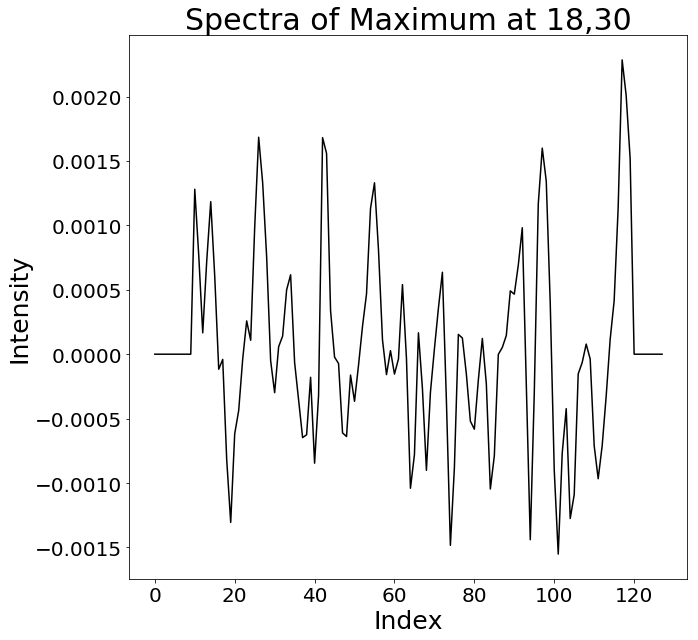

In [112]:
#Plotting the spectrum

f1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 10))

ax1.set_title('Spectra of Maximum at %i,%i' %(xpt,ypt), fontsize=30)
ax1.set_ylabel('Intensity', fontsize=25)
ax1.set_xlabel('Index', fontsize=25)

ax1.plot(Pandas_spec_data.Spec, color = 'k')